# Praktikum 1.1 Natural Language Processing 

### Nama : Ronggur Mahendra Widya Putra
### NIM : 13519008

In [1]:
#Import Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from datasets import load_dataset
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [2]:
# Load Train data
train_df = pd.read_parquet('./data/train-00000-of-00001-04b49ae22f595095.parquet', engine='pyarrow')
train_df.head(10)

,text,label
0,− Scope 3: Optional scope that includes indire...,1
1,The Group is not aware of any noise pollution ...,0
2,Global climate change could exacerbate certain...,0
3,Setting an investment horizon is part and parc...,0
4,Climate change the physical impacts of climate...,0
5,Projects with potential limited adverse social...,0
6,We emitted 13.4 million tonnes CO2 of Scope 2 ...,1
7,We do not provide normalised figures for our C...,1
8,We anticipate that the potential effects of cl...,0
9,Enhancing our responsible screening criteria N...,0


In [3]:
train_df.describe()

,label
count,1000.000000
mean,0.908000
std,0.764278
min,0.000000
25%,0.000000
50%,1.000000
75%,1.250000
max,2.000000


In [4]:
train_df_data  = train_df['text'].to_list()
train_df_label = train_df['label'].to_list()

In [5]:
# Split data
train_data, val_data, train_label, val_label  = train_test_split(train_df_data, train_df_label, test_size=0.2, random_state=230907)


In [6]:
# load test data
test_df = pd.read_parquet('./data/test-00000-of-00001-3f9f7af4f5914b8e.parquet', engine='pyarrow')
test_df.head(10)


,text,label
0,Sustainable strategy ‘red lines’ For our susta...,0
1,"Verizon’s environmental, health and safety man...",1
2,"In 2019, the Company closed a series of transa...",1
3,"In December 2020, the AUC approved the Electri...",0
4,"Finally, there is a reputational risk linked t...",0
5,Ecoefficiency Eco-efficiency management provid...,1
6,The Group and its customers are exposed to cli...,0
7,Both our Board and executive leadership team r...,1
8,Although it is intended that governments will ...,1
9,Climate-related risks and opportunities have g...,0


In [7]:
test_data  = test_df['text'].to_list()
test_label = test_df['label'].to_list()

In [8]:
print("train_label : ", len(train_data))
print("train_label : ",len(train_label))

print("val_label : ", len(val_data))
print("val_label : ",len(val_label))

print("test_data : ",len(test_data))
print("test_label :",len(test_label))


train_label :  800
train_label :  800
val_label :  200
val_label :  200
test_data :  320
test_label : 320


In [9]:
# Preprocess & Tokenize
MAX_WORDS = 10000
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(texts = train_data)

train_sequences = tokenizer.texts_to_sequences(train_data)
train_data_tokenized = pad_sequences(train_sequences, maxlen = 100)

val_sequences = tokenizer.texts_to_sequences(val_data)
val_data_tokenized = pad_sequences(val_sequences, maxlen = 100)

test_sequences = tokenizer.texts_to_sequences(test_data)
test_data_tokenized = pad_sequences(test_sequences, maxlen = 100)


In [10]:
# Cast into numpy array 
train_data_tokenized = np.array(train_data_tokenized)
train_label = np.array(train_label)

val_data_tokenized = np.array(val_data_tokenized)
val_label = np.array(val_label)

test_data_tokenized = np.array(test_data_tokenized)
test_label = np.array(test_label)

# RNN/LSTM MODEL

In [11]:
# Define Model
# Hyper parameter sama dengan contoh di slide
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim = MAX_WORDS, output_dim = 128, input_length = train_data_tokenized.shape[1]))
model_rnn.add(Bidirectional(LSTM(64, return_sequences=True)))
model_rnn.add(Bidirectional(LSTM(32)))
model_rnn.add(Dense(1,activation='sigmoid'))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,420,097
Trainable params: 1,420,097
Non-trainable params: 0
_________________________________________________________________
None


Model Visualize


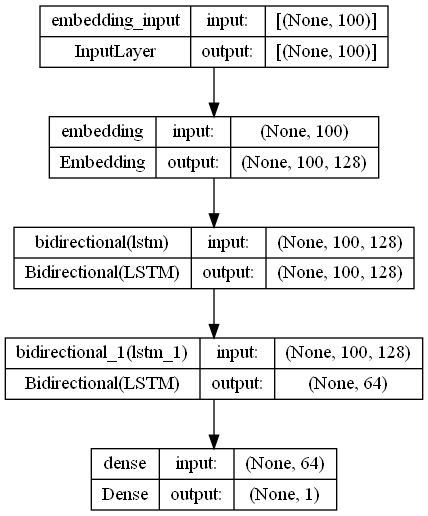

In [12]:
#compile model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_rnn.summary())
print("\n\nModel Visualize")
plot_model(model_rnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
# Train
model_rnn.fit(train_data_tokenized, train_label, epochs=10, batch_size=32, validation_data=(val_data_tokenized, val_label))

Epoch 1/10
25/25 [==============================] - 10s 98ms/step - loss: 0.4541 - accuracy: 0.3950 - val_loss: 0.8960 - val_accuracy: 0.4350
Epoch 2/10
25/25 [==============================] - 1s 33ms/step - loss: 0.1106 - accuracy: 0.4013 - val_loss: 0.0462 - val_accuracy: 0.4350
Epoch 3/10
25/25 [==============================] - 1s 33ms/step - loss: -0.8685 - accuracy: 0.4038 - val_loss: -0.7685 - val_accuracy: 0.4350
Epoch 4/10
25/25 [==============================] - 1s 28ms/step - loss: -1.9435 - accuracy: 0.4475 - val_loss: -1.3484 - val_accuracy: 0.5000
Epoch 5/10
25/25 [==============================] - 1s 30ms/step - loss: -3.0800 - accuracy: 0.6450 - val_loss: -1.6717 - val_accuracy: 0.6750
Epoch 6/10
25/25 [==============================] - 1s 35ms/step - loss: -3.9565 - accuracy: 0.7038 - val_loss: -2.4129 - val_accuracy: 0.6950
Epoch 7/10
25/25 [==============================] - 1s 35ms/step - loss: -4.5824 - accuracy: 0.7200 - val_loss: -2.5853 - val_accuracy: 0.7050
Ep

In [14]:
# Evaluate

loss, acc = model_rnn.evaluate(test_data_tokenized, test_label)
print("loss: ", loss)
print("accuracy: ", acc)

10/10 [==============================] - 0s 12ms/step - loss: -2.1394 - accuracy: 0.7031
loss:  -2.139361619949341
accuracy:  0.703125


In [15]:
# Prediction
prediction = model_rnn.predict(test_data_tokenized[:5])

for text, prediction, groundtruth in zip(tokenizer.sequences_to_texts(test_data_tokenized), prediction, test_label[:5]):
    sentiment = "positive" if prediction > 0.5 else "negative"
    groundtruth = "positive" if groundtruth == 0.5 else "negative"
    print(f"Text: {text} \n Predicted Sentiment: {sentiment}\n Groundtruth: {groundtruth}\n\n")

1/1 [==============================] - 1s 1s/step
Text: sustainable strategy for our sustainable strategy range we incorporate a series of proprietary in order to ensure the performing companies from an esg perspective are not eligible for investment 
 Predicted Sentiment: positive
 Groundtruth: negative


Text: environmental health and safety management system provides a framework for identifying and reducing the risks associated with the environments in which we operate regular management system assessments internal and third party compliance and inspections are performed annually at of facilities worldwide the goal of these assessments is to identify and correct site specific issues and to educate and empower facility managers and supervisors to implement corrective actions environment health and safety efforts are and supported by experienced experts around the world that support our operations and facilities 
 Predicted Sentiment: positive
 Groundtruth: negative


Text: in 2019 th

# Word2Vec Embedding

In [16]:
from gensim.models import Word2Vec

In [17]:
word2vec_model = Word2Vec(sentences=train_data, vector_size=128, window = 5, min_count=1, sg=0)

word2vec_model.save("word2vec.model")

In [18]:
embedding_matrix = np.zeros((MAX_WORDS, 128))
for word,i in tokenizer.word_index.items():
    if i < MAX_WORDS:
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]

In [19]:
# define model
# Hyper parameter sama dengan contoh di slide
word2vec_model = Sequential()
word2vec_model.add(Embedding(input_dim = MAX_WORDS, output_dim = 128, input_length = train_data_tokenized.shape[1], weights= [embedding_matrix], trainable = True ))
word2vec_model.add(Bidirectional(LSTM(64, return_sequences=True)))
word2vec_model.add(Bidirectional(LSTM(32)))
word2vec_model.add(Dense(1,activation='sigmoid'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,420,097
Trainable params: 1,420,097
Non-trainable params: 0
_________________________________________________________________
None


Model Visualize


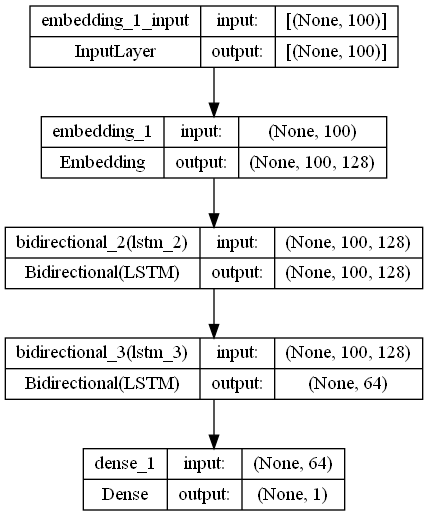

In [20]:
#compile model
word2vec_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(word2vec_model.summary())
print("\n\nModel Visualize")
plot_model(word2vec_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
# Train
word2vec_model.fit(train_data_tokenized, train_label, epochs=10, batch_size=32, validation_data=(val_data_tokenized, val_label))

Epoch 1/10
25/25 [==============================] - 10s 159ms/step - loss: 0.3424 - accuracy: 0.3875 - val_loss: 0.4760 - val_accuracy: 0.4350
Epoch 2/10
25/25 [==============================] - 1s 41ms/step - loss: -0.6074 - accuracy: 0.4187 - val_loss: -0.4288 - val_accuracy: 0.4850
Epoch 3/10
25/25 [==============================] - 1s 41ms/step - loss: -1.6301 - accuracy: 0.5725 - val_loss: -0.3998 - val_accuracy: 0.5300
Epoch 4/10
25/25 [==============================] - 1s 42ms/step - loss: -2.7812 - accuracy: 0.6400 - val_loss: -1.5984 - val_accuracy: 0.6450
Epoch 5/10
25/25 [==============================] - 1s 33ms/step - loss: -3.4326 - accuracy: 0.6438 - val_loss: -1.8470 - val_accuracy: 0.6600
Epoch 6/10
25/25 [==============================] - 1s 26ms/step - loss: -3.8131 - accuracy: 0.6288 - val_loss: -1.5926 - val_accuracy: 0.6050
Epoch 7/10
25/25 [==============================] - 1s 28ms/step - loss: -4.1677 - accuracy: 0.6225 - val_loss: -2.0577 - val_accuracy: 0.6300

In [22]:
# Evaluate

loss, acc = word2vec_model.evaluate(test_data_tokenized, test_label)
print("loss: ", loss)
print("accuracy: ", acc)

10/10 [==============================] - 0s 17ms/step - loss: -0.7301 - accuracy: 0.6469
loss:  -0.7300978899002075
accuracy:  0.6468750238418579


In [23]:
# Prediction
prediction = word2vec_model.predict(test_data_tokenized[:5])

for text, prediction, groundtruth in zip(tokenizer.sequences_to_texts(test_data_tokenized), prediction, test_label[:5]):
    sentiment = "positive" if prediction > 0.5 else "negative"
    groundtruth = "positive" if groundtruth == 0.5 else "negative"
    print(f"Text: {text} \n Predicted Sentiment: {sentiment}\n Groundtruth: {groundtruth}\n\n")

1/1 [==============================] - 1s 1s/step
Text: sustainable strategy for our sustainable strategy range we incorporate a series of proprietary in order to ensure the performing companies from an esg perspective are not eligible for investment 
 Predicted Sentiment: positive
 Groundtruth: negative


Text: environmental health and safety management system provides a framework for identifying and reducing the risks associated with the environments in which we operate regular management system assessments internal and third party compliance and inspections are performed annually at of facilities worldwide the goal of these assessments is to identify and correct site specific issues and to educate and empower facility managers and supervisors to implement corrective actions environment health and safety efforts are and supported by experienced experts around the world that support our operations and facilities 
 Predicted Sentiment: negative
 Groundtruth: negative


Text: in 2019 th

# Report

## Performance

- LSTM MODEL

    Training Accuracy : 0.71

    Test Accuracy : 0.70

- LSTM MODEL with Word2Vec Embedding

    Training Accuracy : 0.70

    Test Accuracy : 0.64
    